In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# check np version
np.__version__

'1.20.2'

# Weather Stations from Canada (from weatherstats.ca)

In [3]:
### get weather statiosn with LONG and LAT from weatherstats.ca
canada_ws_weatherstats = pd.read_csv("data/Weather_stations_canada_from_weatherstats_ca.csv")
canada_ws_weatherstats

,Station Name,Latitude,Longitude,Elevation,IATA,WMO ID,Climate ID,Starting Date (hourly data),Ending Date (hourly data),Starting Date (daily data),Ending Date (daily data),Associated Location
0,(AE) BOW SUMMIT,51.70,-116.47,2080 m,NaN,NaN,3050PPF,NaN,NaN,1998-02-01,2007-11-01,NaN
1,100 MILE HOUSE,51.65,-121.30,1059 m,NaN,NaN,1165791,NaN,NaN,1970-05-01,1999-11-01,100 Mile House
2,100 MILE HOUSE,51.65,-121.27,930 m,NaN,NaN,1095790,NaN,NaN,1957-06-01,1959-08-01,NaN
3,100 MILE HOUSE 6NE,51.68,-121.22,928 m,NaN,NaN,1165793,NaN,NaN,1987-06-01,+,100 Mile House
4,108 MILE HOUSE,51.75,-121.33,957 m,NaN,NaN,1095796,NaN,NaN,1970-05-01,1973-07-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9455,ZELMA,51.80,-105.93,541 m,NaN,NaN,4059220,NaN,NaN,1981-06-01,1989-11-01,NaN
9456,ZHODA,49.25,-96.52,305 m,NaN,NaN,5023370,NaN,NaN,1980-11-01,2000-06-01,NaN
9457,ZURICH,43.40,-81.60,257 m,NaN,NaN,6129850,NaN,NaN,1881-07-01,1898-09-01,NaN
9458,ZWEIBRUCKEN A GERMANY,49.22,-7.42,337 m,NaN,NaN,9032000,NaN,NaN,NaN,NaN,NaN


In [4]:
canada_ws_weatherstats["Latitude"][0]

51.7

# Canada Agricultural Regions

In [5]:
#Get Canadas agricultural regions Boundary file (as shape file)
car = gpd.read_file("data/lcar000a16a_e.shp")
car

,CARUID,CARENAME,CARFNAME,PRUID,PRNAME,geometry
0,1205,Agricultural Region 5,Région agricole 5,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8525489.391 1790548.500, 8525639.114..."
1,1301,Agricultural Region 1,Région agricole 1,13,New Brunswick / Nouveau-Brunswick,"POLYGON ((7998578.391 1612051.631, 7998668.814..."
2,1302,Agricultural Region 2,Région agricole 2,13,New Brunswick / Nouveau-Brunswick,"POLYGON ((8204574.134 1544487.454, 8208027.917..."
3,1303,Agricultural Region 3,Région agricole 3,13,New Brunswick / Nouveau-Brunswick,"POLYGON ((8217369.071 1620627.260, 8217713.531..."
4,1304,Agricultural Region 4,Région agricole 4,13,New Brunswick / Nouveau-Brunswick,"POLYGON ((8188457.820 1707919.583, 8188444.194..."
...,...,...,...,...,...,...
67,1103,Agricultural Region 3,Région agricole 3,11,Prince Edward Island / Île-du-Prince-Édouard,"POLYGON ((8294354.734 1636914.940, 8296485.909..."
68,1201,Agricultural Region 1,Région agricole 1,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8362506.940 1428541.960, 8367260.740..."
69,1202,Agricultural Region 2,Région agricole 2,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8389627.240 1508346.011, 8390011.831..."
70,1203,Agricultural Region 3,Région agricole 3,12,Nova Scotia / Nouvelle-Écosse,"MULTIPOLYGON (((8381659.560 1574688.929, 83836..."


<AxesSubplot:>

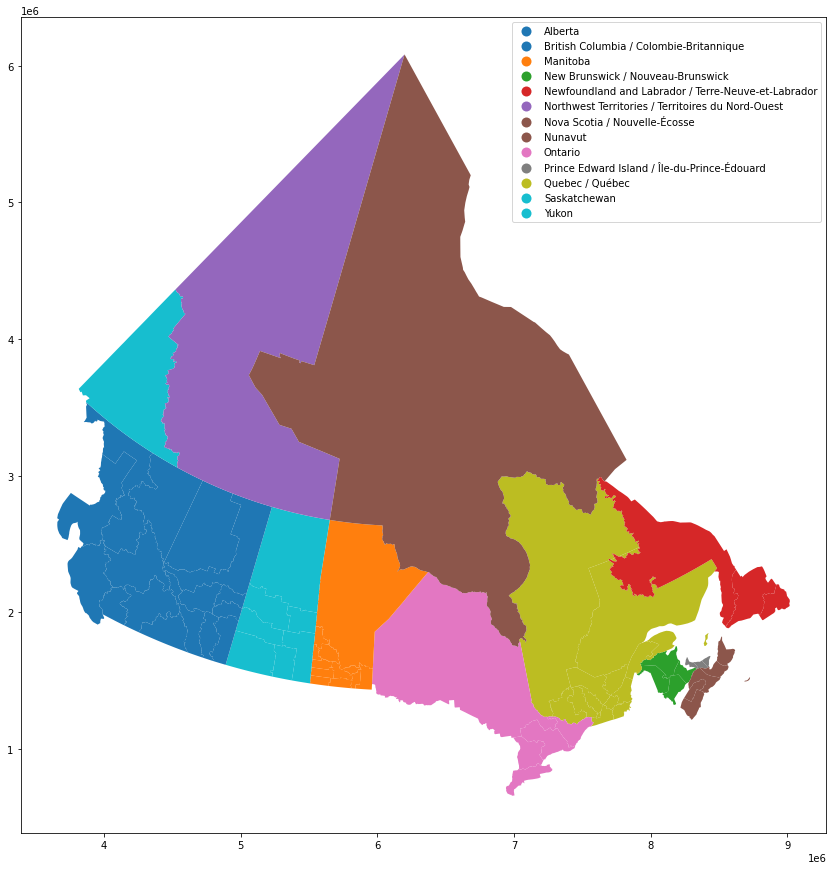

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
car.plot(column='PRNAME', ax=ax, legend=True)

In [7]:
# coordinates for the polygon (of each region)
# units are not degrees
list(car["geometry"][51].exterior.coords)

[(3991663.9685700014, 2528376.828570001),
 (3992887.1142849997, 2527508.120000001),
 (3992986.1457149982, 2527557.5599999987),
 (3993860.6999999993, 2527994.1514299996),
 (3994144.762855001, 2528723.7028549984),
 (3997552.237144999, 2528721.671429999),
 (3997836.2828550003, 2528072.342854999),
 (3997349.8257150017, 2527138.9142850004),
 (3997390.605714999, 2526083.81143),
 (3997187.9571450017, 2525475.082855001),
 (3997111.9800000004, 2525128.3999999985),
 (3997081.5085700005, 2525077.1914299987),
 (3997085.382855002, 2525024.2685699984),
 (3997090.2228550017, 2525021.2714300007),
 (3997088.68857, 2525014.2714300007),
 (3996824.974284999, 2523810.4800000004),
 (3997190.2228550017, 2522795.52857),
 (3997677.0342850015, 2522470.5171450004),
 (3998163.8228549995, 2522551.157145001),
 (3999994.1942850016, 2523211.185715001),
 (4000070.434285, 2523238.6771450005),
 (4002261.3085700013, 2526195.780000001),
 (4004167.920000002, 2526883.3000000007),
 (4006723.5599999987, 2526637.5),
 (4006805.

In [8]:
# check Coordinate Reference system used in the Boundary File (as Shape file)
# This tells us the name of the CRS and the units for it 
car.crs

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# more details about the CRS
car.crs.datum

DATUM["North American Datum 1983",
    ELLIPSOID["GRS 1980",6378137,298.257222101,
        LENGTHUNIT["metre",1]],
    ID["EPSG",6269]]

In [10]:
# Convert CRS from PCS_LCC to EPSG=4326 that handles the coordinates in degrees
car = car.to_crs(epsg=4326)

In [11]:
#Coordinates are now in degrees
list(car["geometry"][51].exterior.coords)

[(-127.22423203552442, 53.25025901436753),
 (-127.20147361017392, 53.24941367475886),
 (-127.20059107409728, 53.250272687257414),
 (-127.19279546673117, 53.257858329923664),
 (-127.19497441613383, 53.26487475315442),
 (-127.15091733677556, 53.2812299498579),
 (-127.14204294371694, 53.27756156813607),
 (-127.14085695678047, 53.26799218723413),
 (-127.13188323203593, 53.26001063048883),
 (-127.12963081376078, 53.254320146478186),
 (-127.12783869696905, 53.25126855877473),
 (-127.12782275842423, 53.25072544018627),
 (-127.127349263548, 53.25033384674268),
 (-127.12726273775884, 53.25033384205885),
 (-127.1272265598648, 53.25027222527566),
 (-127.1210050074277, 53.23967660242641),
 (-127.10817124251673, 53.23356144683768),
 (-127.0992839762292, 53.23337643004267),
 (-127.09363837818486, 53.23633555838192),
 (-127.0752533512474, 53.25022664963767),
 (-127.07448726931007, 53.25080518956645),
 (-127.06978360957326, 53.28423677572973),
 (-127.05059936655292, 53.298703981777884),
 (-127.0155319

<AxesSubplot:>

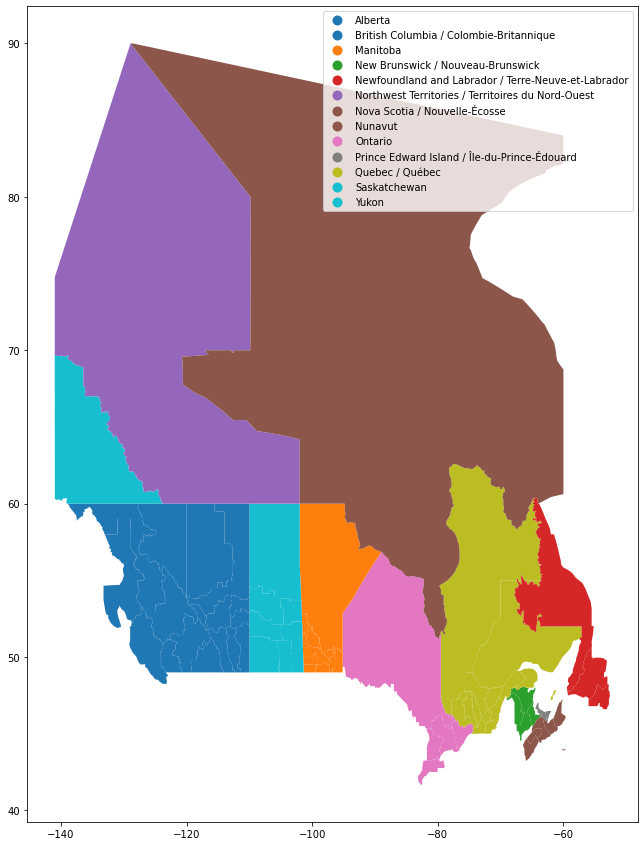

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
car.plot(column='PRNAME', ax=ax, legend=True)

## BC Agricultural Regions

In [13]:
bc_final = car[car["PRNAME"]=="British Columbia / Colombie-Britannique"]
bc_final

,CARUID,CARENAME,CARFNAME,PRUID,PRNAME,geometry
51,5901,Vancouver Island-Coast,Vancouver Island-Coast,59,British Columbia / Colombie-Britannique,"POLYGON ((-127.22423 53.25026, -127.20147 53.2..."
52,5902,Lower Mainland-Southwest,Lower Mainland-Southwest,59,British Columbia / Colombie-Britannique,"POLYGON ((-122.92308 51.18671, -122.90526 51.1..."
53,5903,Thompson-Okanagan,Thompson-Okanagan,59,British Columbia / Colombie-Britannique,"POLYGON ((-120.24250 52.86151, -120.23254 52.8..."
54,5904,Kootenay,Kootenay,59,British Columbia / Colombie-Britannique,"POLYGON ((-116.21909 51.29450, -116.21904 51.2..."
55,5905,Cariboo,Cariboo,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.77346 55.95748, -123.76207 55.9..."
56,5906,North Coast,North Coast,59,British Columbia / Colombie-Britannique,"POLYGON ((-128.95874 58.74781, -129.00225 57.9..."
57,5907,Nechako,Nechako,59,British Columbia / Colombie-Britannique,"POLYGON ((-135.40000 60.00006, -135.38750 60.0..."
58,5908,Peace River,Peace River,59,British Columbia / Colombie-Britannique,"POLYGON ((-127.71250 60.00003, -127.70000 60.0..."


In [14]:
# get the exterior coordinates on the polygon (as a list)
bc_final['geomlist'] = bc_final['geometry'].apply(lambda x: list(x.exterior.coords))
bc_final

C:\Users\Design\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,CARUID,CARENAME,CARFNAME,PRUID,PRNAME,geometry,geomlist
51,5901,Vancouver Island-Coast,Vancouver Island-Coast,59,British Columbia / Colombie-Britannique,"POLYGON ((-127.22423 53.25026, -127.20147 53.2...","[(-127.22423203552442, 53.25025901436753), (-1..."
52,5902,Lower Mainland-Southwest,Lower Mainland-Southwest,59,British Columbia / Colombie-Britannique,"POLYGON ((-122.92308 51.18671, -122.90526 51.1...","[(-122.92307713727733, 51.18670765213103), (-1..."
53,5903,Thompson-Okanagan,Thompson-Okanagan,59,British Columbia / Colombie-Britannique,"POLYGON ((-120.24250 52.86151, -120.23254 52.8...","[(-120.24250451078255, 52.86150981031098), (-1..."
54,5904,Kootenay,Kootenay,59,British Columbia / Colombie-Britannique,"POLYGON ((-116.21909 51.29450, -116.21904 51.2...","[(-116.21908677714352, 51.294504374476944), (-..."
55,5905,Cariboo,Cariboo,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.77346 55.95748, -123.76207 55.9...","[(-123.77346021565627, 55.957478607578956), (-..."
56,5906,North Coast,North Coast,59,British Columbia / Colombie-Britannique,"POLYGON ((-128.95874 58.74781, -129.00225 57.9...","[(-128.9587355525884, 58.74781277627221), (-12..."
57,5907,Nechako,Nechako,59,British Columbia / Colombie-Britannique,"POLYGON ((-135.40000 60.00006, -135.38750 60.0...","[(-135.4000000267136, 60.00005904728056), (-13..."
58,5908,Peace River,Peace River,59,British Columbia / Colombie-Britannique,"POLYGON ((-127.71250 60.00003, -127.70000 60.0...","[(-127.7125001089991, 60.000031374741), (-127...."


In [15]:
# check the coodinates
bc_final['geomlist'][51]

[(-127.22423203552442, 53.25025901436753),
 (-127.20147361017392, 53.24941367475886),
 (-127.20059107409728, 53.250272687257414),
 (-127.19279546673117, 53.257858329923664),
 (-127.19497441613383, 53.26487475315442),
 (-127.15091733677556, 53.2812299498579),
 (-127.14204294371694, 53.27756156813607),
 (-127.14085695678047, 53.26799218723413),
 (-127.13188323203593, 53.26001063048883),
 (-127.12963081376078, 53.254320146478186),
 (-127.12783869696905, 53.25126855877473),
 (-127.12782275842423, 53.25072544018627),
 (-127.127349263548, 53.25033384674268),
 (-127.12726273775884, 53.25033384205885),
 (-127.1272265598648, 53.25027222527566),
 (-127.1210050074277, 53.23967660242641),
 (-127.10817124251673, 53.23356144683768),
 (-127.0992839762292, 53.23337643004267),
 (-127.09363837818486, 53.23633555838192),
 (-127.0752533512474, 53.25022664963767),
 (-127.07448726931007, 53.25080518956645),
 (-127.06978360957326, 53.28423677572973),
 (-127.05059936655292, 53.298703981777884),
 (-127.0155319

<AxesSubplot:>

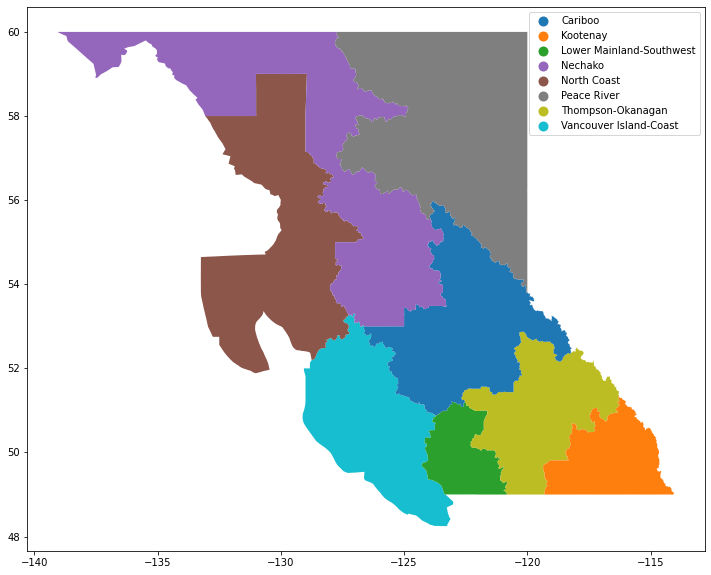

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
bc_final.plot(column='CARENAME', ax=ax, legend=True)

## Mark the Weather stations to BC regions

In [ ]:
#### Mark the Weather stations to BC regions
#### Weather stations dataset contains all the weather stations in canada but not grouped by Province
#### so we'll have to loop though all of them to mark the region for each

In [18]:
# Check if a coordinate is in a polygon

def point_inside_polygon(lat,lng,poly):
    n = len(poly)
    inside =False
    
    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if lat > min(p1y,p2y):
            if lat <= max(p1y,p2y):
                if lng <= max(p1x,p2x):
                    if p1y != p2y:
                        xinters = (lat-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or lng <= xinters:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

In [19]:
canada_ws_weatherstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 8807 non-null   object 
 1   Latitude                     8806 non-null   float64
 2   Longitude                    8806 non-null   float64
 3   Elevation                    8665 non-null   object 
 4   IATA                         1754 non-null   object 
 5   WMO ID                       1093 non-null   float64
 6   Climate ID                   8806 non-null   object 
 7   Starting Date (hourly data)  2017 non-null   object 
 8   Ending Date (hourly data)    2017 non-null   object 
 9   Starting Date (daily data)   8480 non-null   object 
 10  Ending Date (daily data)     8480 non-null   object 
 11  Associated Location          1826 non-null   object 
dtypes: float64(3), object(9)
memory usage: 887.0+ KB


In [23]:
## Loop through all BC regions and than mark the region in the weather station with the region it belongs
## For now, this is fo rBC only but we can expand this loop to every province and teritory

## NOTE: Will run for few minutes

for x, i in enumerate(canada_ws_weatherstats["Station Name"]):
    for k in bc_final.index:
        if point_inside_polygon(canada_ws_weatherstats["Latitude"][x],canada_ws_weatherstats["Longitude"][x],bc_final["geomlist"][k]):
            canada_ws_weatherstats.at[x,"BC_Region"]="BC"+bc_final.at[k,"CARUID"][-2:]

In [24]:
canada_ws_weatherstats

,Station Name,Latitude,Longitude,Elevation,IATA,WMO ID,Climate ID,Starting Date (hourly data),Ending Date (hourly data),Starting Date (daily data),Ending Date (daily data),Associated Location,BC_Region
0,(AE) BOW SUMMIT,51.70,-116.47,2080 m,NaN,NaN,3050PPF,NaN,NaN,1998-02-01,2007-11-01,NaN,NaN
1,100 MILE HOUSE,51.65,-121.30,1059 m,NaN,NaN,1165791,NaN,NaN,1970-05-01,1999-11-01,100 Mile House,BC05
2,100 MILE HOUSE,51.65,-121.27,930 m,NaN,NaN,1095790,NaN,NaN,1957-06-01,1959-08-01,NaN,BC05
3,100 MILE HOUSE 6NE,51.68,-121.22,928 m,NaN,NaN,1165793,NaN,NaN,1987-06-01,+,100 Mile House,BC05
4,108 MILE HOUSE,51.75,-121.33,957 m,NaN,NaN,1095796,NaN,NaN,1970-05-01,1973-07-01,NaN,BC05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,ZELMA,51.80,-105.93,541 m,NaN,NaN,4059220,NaN,NaN,1981-06-01,1989-11-01,NaN,NaN
9456,ZHODA,49.25,-96.52,305 m,NaN,NaN,5023370,NaN,NaN,1980-11-01,2000-06-01,NaN,NaN
9457,ZURICH,43.40,-81.60,257 m,NaN,NaN,6129850,NaN,NaN,1881-07-01,1898-09-01,NaN,NaN
9458,ZWEIBRUCKEN A GERMANY,49.22,-7.42,337 m,NaN,NaN,9032000,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
type(canada_ws_weatherstats)

pandas.core.frame.DataFrame

In [26]:
type(bc_final)

geopandas.geodataframe.GeoDataFrame

In [27]:
## convert canada_ws_weatherstats to Geopandas Dataframe and 
## then plt both bc-final and canada_ws_weatherstats in the same plot

from shapely.geometry import Point, Polygon
# for Geodataframe we need a geometry feature (in this case it will be a point for the long, lat)
geometry = [Point(xy) for xy in zip(canada_ws_weatherstats["Longitude"], canada_ws_weatherstats["Latitude"])]
geometry[:3]

In [28]:
crs={"init":"epsg:4326"}
canada_ws_FINAL = gpd.GeoDataFrame(canada_ws_weatherstats,crs=crs, geometry=geometry)
canada_ws_FINAL.head()

C:\Users\Design\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Station Name,Latitude,Longitude,Elevation,IATA,WMO ID,Climate ID,Starting Date (hourly data),Ending Date (hourly data),Starting Date (daily data),Ending Date (daily data),Associated Location,BC_Region,geometry
0,(AE) BOW SUMMIT,51.70,-116.47,2080 m,NaN,NaN,3050PPF,NaN,NaN,1998-02-01,2007-11-01,NaN,NaN,POINT (-116.47000 51.70000)
1,100 MILE HOUSE,51.65,-121.30,1059 m,NaN,NaN,1165791,NaN,NaN,1970-05-01,1999-11-01,100 Mile House,BC05,POINT (-121.30000 51.65000)
2,100 MILE HOUSE,51.65,-121.27,930 m,NaN,NaN,1095790,NaN,NaN,1957-06-01,1959-08-01,NaN,BC05,POINT (-121.27000 51.65000)
3,100 MILE HOUSE 6NE,51.68,-121.22,928 m,NaN,NaN,1165793,NaN,NaN,1987-06-01,+,100 Mile House,BC05,POINT (-121.22000 51.68000)
4,108 MILE HOUSE,51.75,-121.33,957 m,NaN,NaN,1095796,NaN,NaN,1970-05-01,1973-07-01,NaN,BC05,POINT (-121.33000 51.75000)


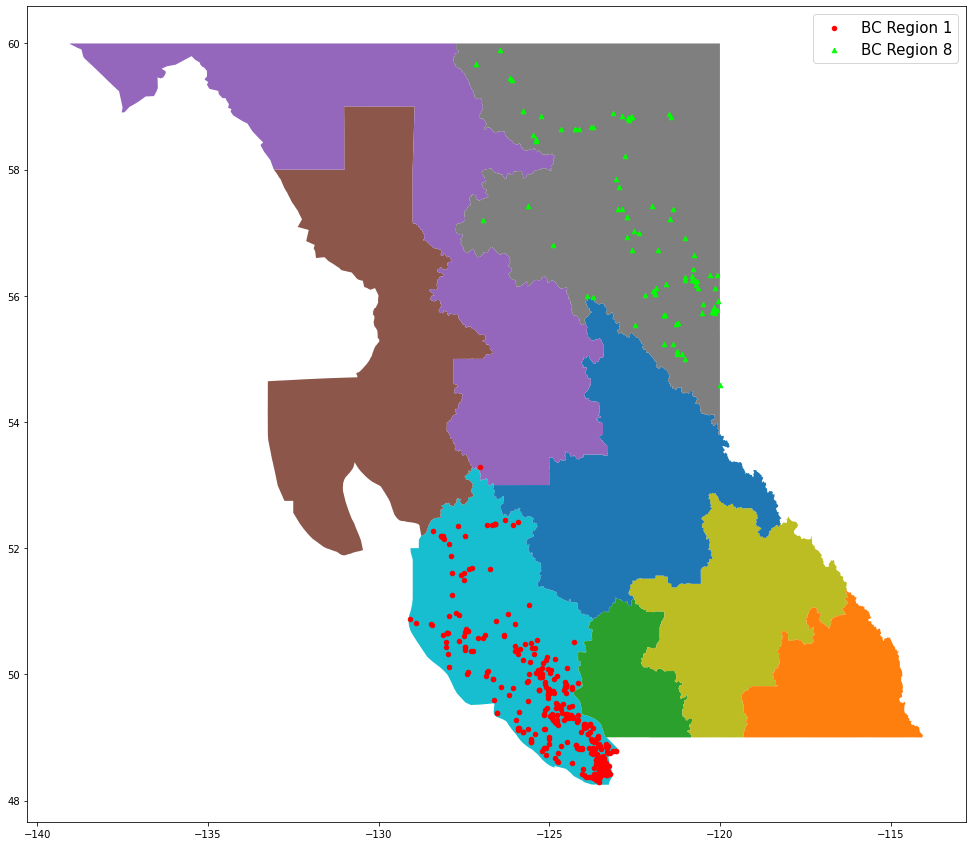

In [29]:
fig, ax = plt.subplots(figsize=(20,15))
bc_final.plot(column='CARENAME', ax=ax, legend=True)
canada_ws_FINAL[canada_ws_FINAL["BC_Region"]=="BC01"].plot(ax=ax, markersize=20,color="red", marker="o", label="BC Region 1")
canada_ws_FINAL[canada_ws_FINAL["BC_Region"]=="BC08"].plot(ax=ax, markersize=20,color="lime", marker="^", label="BC Region 8")
plt.savefig("Weatherstations_BC_Regions_01_and_08.pdf", format="pdf")
plt.legend(prop={'size':15})